# 01 - Exploração inicial dos dados: Kaggle Titanic  

A competição do Titanic no Kaggle é amplamente recomendada para iniciantes, pois oferece um conjunto de dados acessível e estruturado. Com variáveis simples como idade, sexo e classe socioeconômica, os participantes têm a oportunidade de praticar técnicas básicas de análise de dados e modelagem preditiva. Essa competição serve como uma introdução gerenciável ao Kaggle, permitindo que novatos aprendam os fundamentos da ciência de dados de forma prática e eficaz. **O objetivo é prever quais passageiros nos dados de teste irão sobreviver baseado nos passageiros nos dados de treinamento**.

O objetivo desse notebook é explorar os dados e tenta resolver o problema das informações faltantes. A competição no Kaggle e os dados originais podem ser obtidos [aqui](https://www.kaggle.com/competitions/titanic/).

## Sobre os dados

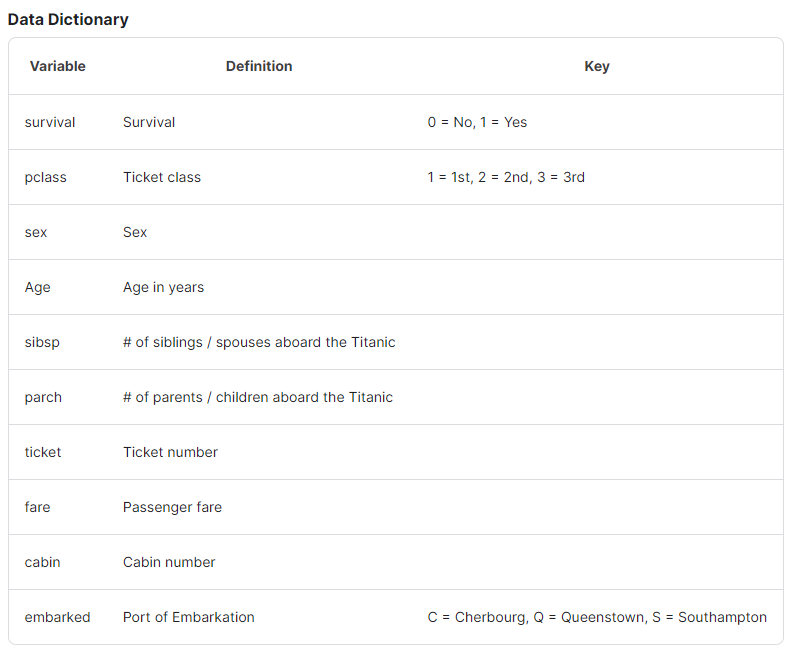

Os dados originais estão dentro de `data/original`. São 4 arquivos:

* `train.csv`: dados de treinamento. São os dados que passarão por todas as análises e tratamento. O objetivo é, com esses dados, criar um algoritmo que seja capaz de prever os dados dentro dos dados de teste.
* `test.csv`: dados de teste. Servem _apenas_ para rodar a versão final do algoritmo e submeter para o Kaggle. Não devem ser realizadas análises ou mudanças no algoritmo baseados nos dados. Mesmo as estratégias de _feature engineering_ devem ser feitas apenas com os dados de treino e simplesmente _aplicadas_ em teste. Considere os dados de teste como _validação_.
* `gender_submission.csv`: arquivo de exemplo do envio para o Kaggle.
* `ground_truth`: predições corretas para os dados de teste. Esse arquivo não é fornecido no projeto de teste do Kaggle e deve apenas ser usado aqui para economizar uploads no Kaggle (limite 10 por dia).

## Preparando o ambiente

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

Alterando o tamanho padrão das figuras gráficas.

In [2]:
mpl.rcParams['figure.figsize'] = (12, 7)

## Carregando os dados

In [3]:
titanic = pd.read_csv('../data/original/train.csv')
teste = pd.read_csv('../data/original/test.csv')
titanic.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
768,769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,371110,24.1500,NaN,Q
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,E25,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
687,688,0,3,"Dakic, Mr. Branko",male,19.0,0,0,349228,10.1708,NaN,S
675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.7750,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q


## Analisando os dados

Essa é uma das etapas mais importantes de um projeto de Machine Learning. Muitas vezes essa é a tarefa que mais consome tempo em um projeto. A análise é feita também exclusivamente com os dados de treino. Considerar os de teste aqui pode gerar viés na análise e qual graça teria?

Note abaixo que temos já o problema de dados omissos. Vamos antes extrair algumas informações desses dados e logo voltaremos para esse problema.

In [4]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Extraindo informações

### Faixas etárias por pronome de tratamento

Uma forma de resolver os faltantes de idade e agrupar as pessoas por faixas etárias pode ser separar o pronome de tratamento utilizado no nome e relacioná-lo à idade.

In [5]:
titles = []
for nome in titanic['Name']:
  titles.append(nome.split(',')[1].split('.')[0].strip())

titanic['title'] = titles
titanic.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

### Andar da Cabine

O número específico da cabine é irrelevante, visto que identifica o usuário e não temos um mapa do navio para identificar a correlação. Portanto retiramos o número e ficamos apenas com a string, alterando, inclusive, o nome da coluna.

In [6]:
titanic.loc[(titanic.Cabin.notnull()), 'Cabin'] = titanic.loc[(titanic.Cabin.notnull()), 'Cabin'].astype(str).str[0]
titanic.rename(columns={'Cabin': 'Floor'}, inplace=True)

In [7]:
titanic['Floor'].value_counts()

Floor
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

### Total de parentes

Criar coluna com o total de parentes que cada pessoa tinha a bordo. Um dos objetivos é identificar a relação entre sobrevivência e estar sozinho.

In [8]:
titanic['Relateds'] = titanic['SibSp'] + titanic['Parch']
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Floor,Embarked,title,Relateds
253,254,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,A/5. 3336,16.10,NaN,S,Mr,1
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.90,NaN,S,Mrs,5
472,473,1,2,"West, Mrs. Edwy Arthur (Ada Mary Worth)",female,33.0,1,2,C.A. 34651,27.75,NaN,S,Mrs,3
577,578,1,1,"Silvey, Mrs. William Baird (Alice Munger)",female,39.0,1,0,13507,55.90,E,S,Mrs,1
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.55,NaN,S,Mr,0


## Resolvendo os dados omissos

Vamos olhar para os dados. Estamos evitando os dados de teste, mas e se eles tiverem dados omissos que não existiam nos dados de treinamento? Podemos até fazer algum tratamento, mas em um cenário real, isso precisaria ser observado com o tempo até virar dado de treino e reforçar o algoritmo.

### Identificando os dados

In [9]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Floor        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    object 
 13  Relateds     891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


### Age

Que estratégias utilizar para este campo? Podemos fazer apenas uma estatística básica (média ou mediana), mas vamos fazer uma alternativa um pouco mais elaborada.

**Utilizando os pronomes de tratamento**

In [11]:
titanic.groupby(['title', 'Sex']).Age.describe().sort_values(by='std', ascending=False)

,,count,mean,std,min,25%,50%,75%,max
title,Sex,,,,,,,,
Rev,male,6.0,43.166667,13.136463,27.00,31.500,46.5,53.25,57.0
Miss,female,146.0,21.773973,12.990292,0.75,14.125,21.0,30.00,63.0
Dr,male,5.0,40.600000,12.876335,23.00,32.000,44.0,50.00,54.0
Mr,male,398.0,32.368090,12.708793,11.00,23.000,30.0,39.00,80.0
Mrs,female,108.0,35.898148,11.433628,14.00,27.750,35.0,44.00,63.0
Major,male,2.0,48.500000,4.949747,45.00,46.750,48.5,50.25,52.0
Master,male,36.0,4.574167,3.619872,0.42,1.000,3.5,8.00,12.0
Col,male,2.0,58.000000,2.828427,56.00,57.000,58.0,59.00,60.0
Mlle,female,2.0,24.000000,0.000000,24.00,24.000,24.0,24.00,24.0


In [12]:
pessoa_adulta = ['Rev', 'Dr', 'Mr', 'Major', 'Don', 'Jonkheer', 'Sir', 'Mrs', 'Lady', 'Ms', 'the Countess', 'Col', 'Capt']
mulher_solteira = ['Miss', 'Mlle', 'Mme']
menino_crianca = ['Master']

In [13]:
faixa_etaria = []
for title in titanic['title']:
  if (title in menino_crianca):
    faixa_etaria.append('menino_crianca')
  elif (title in mulher_solteira):
    faixa_etaria.append('mulher_solteira')
  else:
    faixa_etaria.append('pessoa_adulta')

titanic['faixa'] = faixa_etaria
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Floor,Embarked,title,Relateds,faixa
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,pessoa_adulta
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,1,pessoa_adulta
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,mulher_solteira
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,1,pessoa_adulta
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,pessoa_adulta


In [14]:
por_faixa = titanic.groupby(['faixa']).Age.describe()
por_faixa

,count,mean,std,min,25%,50%,75%,max
faixa,,,,,,,,
menino_crianca,36.0,4.574167,3.619872,0.42,1.0,3.5,8.0,12.0
mulher_solteira,149.0,21.818792,12.861787,0.75,14.5,21.0,30.0,63.0
pessoa_adulta,529.0,33.628544,12.715473,11.00,24.0,31.0,42.0,80.0


In [15]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Floor', 'Embarked', 'title', 'Relateds',
       'faixa'],
      dtype='object')

In [16]:
sem_idade = titanic.query("Age.isnull().values")
sem_idade.groupby(['faixa']).describe()

PassengerId                                              \
                      count        mean         std   min    25%    50%   
faixa                                                                     
menino_crianca          4.0  278.250000  291.943345  66.0  136.5  168.5   
mulher_solteira        36.0  396.694444  242.895841  29.0  234.5  345.0   
pessoa_adulta         137.0  450.394161  250.654448   6.0  257.0  467.0   

                               Survived            ...       Fare            \
                    75%    max    count      mean  ...        75%       max   
faixa                                              ...                        
menino_crianca   310.25  710.0      4.0  0.500000  ...  36.487525   69.5500   
mulher_solteira  594.75  889.0     36.0  0.611111  ...  23.625000  110.8833   
pessoa_adulta    644.00  879.0    137.0  0.204380  ...  24.150000  227.5250   

                Relateds                                                
                   count      mean       std  min  25%  50%  75%   max  
faixa                                                                   
menino_crianca       4.0  4.500000  3.785939  2.0  2.0  3.0  5.5  10.0  
mulher_solteira     36.0  1.527778  2.873386  0.0  0.0  0.0  2.0  10.0  
pessoa_adulta      137.0  0.430657  1.528146  0.0  0.0  0.0  0.0  10.0  

[3 rows x 64 columns]

O que apresentamos aqui é uma solução possível um pouco mais "elaborada". Seria possível preencher com a média geral ou usar algum tipo de algoritmo de clusterização e pegar a média dos vizinhos mais próximos.

In [17]:
def preenche_idade_por_faixa(nome_faixa):
  mc = por_faixa.query(f"faixa == '{nome_faixa}'")
  i = int((mc['mean'] - (mc['std'])).values[0] + 1)
  f = int((mc['mean'] + (mc['std'])).values[0] - 1)
  n = len(titanic.loc[(titanic.Age.isnull()) & (titanic.faixa == nome_faixa)])
  values = np.random.randint(i, f, n)
  titanic.loc[(titanic.Age.isnull()) & (titanic.faixa == nome_faixa), 'Age'] = values

In [18]:
preenche_idade_por_faixa('menino_crianca')
preenche_idade_por_faixa('mulher_solteira')
preenche_idade_por_faixa('pessoa_adulta')

Alterando as idades para o valor inteiro, pois os decimais das idades das crianças menores de um ano não tem grande relevância.

In [19]:
titanic['Age'] = titanic['Age'].astype(int)

In [20]:
titanic.Age.unique()

array([22, 38, 26, 35, 54,  2, 27, 14,  4, 58, 20, 39, 55, 24, 31, 43, 34,
       15, 28,  8, 44, 19, 40, 29, 66, 42, 30, 21, 18, 32,  3, 33,  7, 49,
       65, 37,  5, 11, 45, 17, 16, 25,  0,  9, 36, 23, 46, 59, 71, 47, 70,
       12, 51,  1, 61, 56, 50, 41, 13, 62, 52, 63, 60, 10, 64, 48, 53, 57,
       80,  6, 74])

In [21]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Floor          687
Embarked         2
title            0
Relateds         0
faixa            0
dtype: int64

Baseado em todas as análises, dividindo pelas possíveis faixas etárias, foram atribuídas as idades baseada no intervalo `[STD - MD, MD, STD + MD]` de forma aleatória.

### Floor

Contém a primeira letra dos dados inicialmente identificados como `Cabin`. O propósito é tentar identificar alguma relação que permita utilizar essa coluna como relevante de alguma forma.

Para isso, vamos criar uma coluna `possui_cabine` para identificar e comparar os registros com e sem cabine informada e identificar se o ato de informar ou não tem alguma relevância nos dados.

In [22]:
titanic['possui_cabine'] = titanic['Floor'].notnull()

In [23]:
com_cabine = titanic[titanic['possui_cabine'] == True]
sem_cabine = titanic[titanic['possui_cabine'] == False]

#### Comparando o andar com a classe

In [24]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Floor', 'Embarked', 'title', 'Relateds',
       'faixa', 'possui_cabine'],
      dtype='object')

In [25]:
titanic.Pclass.unique()

array([3, 1, 2], dtype=int64)

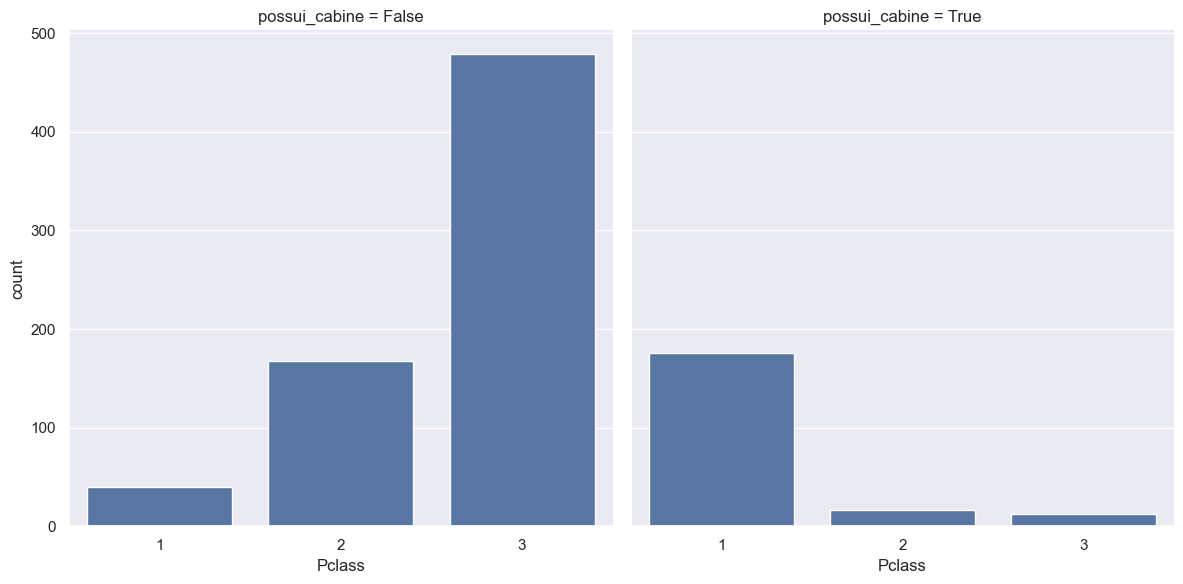

In [26]:
#sns.countplot(x='Pclass', data=com_cabine);
sns.set(style='darkgrid')
g = sns.FacetGrid(titanic, col="possui_cabine", height=6)
g.map(sns.countplot, "Pclass", order=[1, 2, 3]);

Parece existir uma certa correlação entre a classe e ter ou não cabine registrada. A maior parte da primeira classe possui cabine registrada, enquanto uma minoria da terceira classe possui.

Note que aqueles com cabine sobreviveram mais.

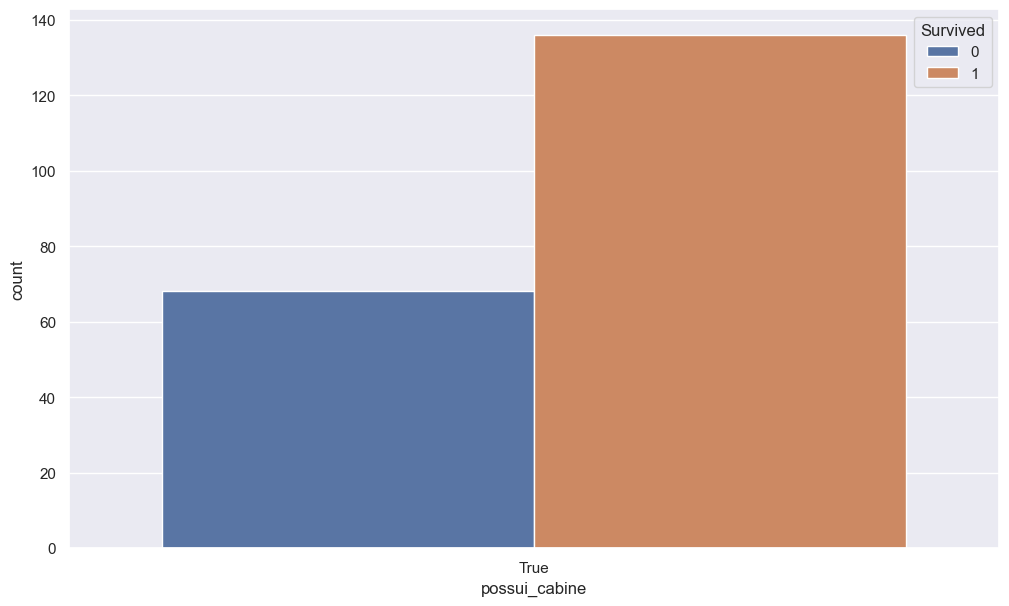

In [27]:
sns.countplot(x = 'possui_cabine', hue='Survived', data=com_cabine);

Parece existir realmente uma relação entre o andar e sobreviver, ainda que não seja muito relevante e possa acabar viciando os dados. Por hora vamos preencher todos os nulos com `SC`: _sem cabine_ para identificar que possivelmente eles não tinham realmente cabine.

In [28]:
titanic.Floor.fillna('SC', inplace=True)
titanic.isnull().sum()

C:\Users\salatiel.costa\AppData\Local\Temp\ipykernel_93672\3517388166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.Floor.fillna('SC', inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Floor            0
Embarked         2
title            0
Relateds         0
faixa            0
possui_cabine    0
dtype: int64

### Embarked

Como para este caso existem apenas dois registros não informados vou preencher com o valor mais frequente para esta coluna.

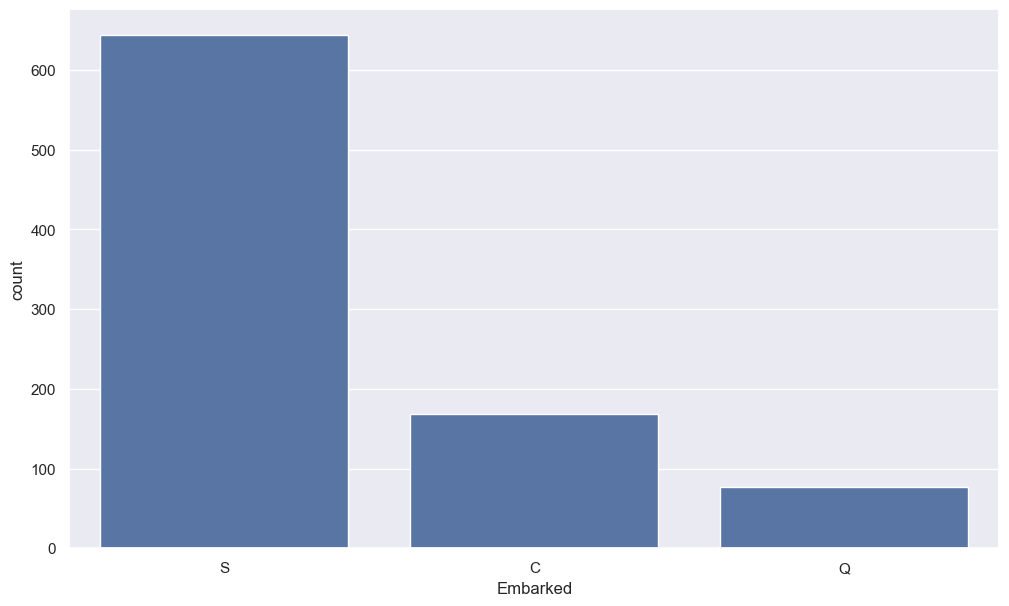

In [29]:
sns.countplot(x = 'Embarked', data=titanic);

In [30]:
titanic.Embarked.fillna('S', inplace=True)
titanic.isnull().sum()

C:\Users\salatiel.costa\AppData\Local\Temp\ipykernel_93672\1995087328.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.Embarked.fillna('S', inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Floor            0
Embarked         0
title            0
Relateds         0
faixa            0
possui_cabine    0
dtype: int64

## Removendo colunas irrelevantes

Algumas informações como `PassengerId`, `Ticked` e `Name` são irrelevantes para o aprendizado pois são únicos para cada passageiro e podem ser removidos da base de aprendizado. O mesmo deve ser feito posteriormente para o tratamento dos dados de teste. Vamos primeiro salvar o dataset completo e depois o dataset sem as colunas desnecessárias. O campo `Fare` até pode indicar alguma coisa de poder aquisitivo da pessoa, mas essa inforamção está em outros campos e a data e local de compra influenciam também no preço. Podem, na verdade, distorcer os dados.

In [31]:
titanic.drop(columns=['PassengerId', 'Name', 'Fare', 'title', 'faixa', 'possui_cabine', 'Ticket'], inplace=True)

In [32]:
titanic.to_csv('../data/processed/train_processed.csv')

In [33]:
titanic.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds
442,0,3,male,25,1,0,SC,S,1
866,1,2,female,27,1,0,SC,C,1
544,0,1,male,50,1,0,C,C,1
263,0,1,male,40,0,0,B,S,0
798,0,3,male,30,0,0,SC,C,0
